In [2]:
import os
import shutil
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras import regularizers
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.image as plt_image
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
# Path ke direktori dataset
dataset_dir = '../data/javaneseScript_byPhiard/train'
output_dir = '../data_pre/byPhiard_aug_v3'

datagen = ImageDataGenerator(
    rotation_range=18,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest'
)

# Membuat folder baru untuk menyimpan hasil augmentasi
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Loop melalui setiap kelas dalam dataset
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)

    # Membuat folder baru untuk setiap kelas di dalam folder output
    output_class_path = os.path.join(output_dir, class_name)
    if not os.path.exists(output_class_path):
        os.makedirs(output_class_path)

    # Mendapatkan list file gambar di setiap kelas
    image_files = [os.path.join(class_path, file) for file in os.listdir(class_path) if file.endswith(('jpg', 'jpeg', 'png'))]

    # Loop melalui setiap file gambar dan augmentasi datanya
    for img_path in image_files:
        img = image.load_img(img_path, target_size=(100, 100))
        x = image.img_to_array(img)
        x = x.reshape((1,) + x.shape)

        # Proses augmented images
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_class_path,
                                  save_prefix=os.path.splitext(os.path.basename(img_path))[0] + '_aug', save_format='png'):
            i += 1
            if i >= 560:  
                break
        break
            
print(f"\nAugmentasi Selesai!")


Augmentasi Selesai!


In [32]:
# Dictionary untuk menyimpan jumlah data di setiap kelas
kelas_data_count = {}

# Loop melalui setiap kelas di dalam folder output
for class_name in os.listdir(output_dir):
    class_path = os.path.join(output_dir, class_name)
    
    # Menghitung jumlah file gambar di setiap kelas
    num_images = len([file for file in os.listdir(class_path) if file.endswith(('jpg', 'jpeg', 'png'))])
    
    # Menyimpan jumlah data di setiap kelas ke dalam dictionary
    kelas_data_count[class_name] = num_images

# Menampilkan jumlah data di setiap kelas
for class_name, count in kelas_data_count.items():
    print(f"Kelas {class_name}: {count} gambar")

Kelas ba: 548 gambar
Kelas ca: 541 gambar
Kelas da: 538 gambar
Kelas dha: 546 gambar
Kelas ga: 544 gambar
Kelas ha: 550 gambar
Kelas ja: 538 gambar
Kelas ka: 543 gambar
Kelas la: 543 gambar
Kelas ma: 543 gambar
Kelas na: 542 gambar
Kelas nga: 544 gambar
Kelas nya: 545 gambar
Kelas pa: 539 gambar
Kelas ra: 547 gambar
Kelas sa: 542 gambar
Kelas ta: 550 gambar
Kelas tha: 548 gambar
Kelas wa: 538 gambar
Kelas ya: 547 gambar


In [33]:
import random
import string

# Path dataset
data = output_dir

# List kelas
kelas_aksara = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

# Target jumlah gambar per kelas
target_jumlah = 550

# Loop untuk setiap kelas
for kelas in kelas_aksara:
    # Path kelas
    kelas_path = os.path.join(data, kelas)
    
    # Jumlah gambar saat ini
    jumlah_gambar = len(os.listdir(kelas_path))
    
    # Selisih gambar yang perlu ditambahkan
    selisih = target_jumlah - jumlah_gambar
    
    # Jika selisih positif, lakukan oversampling
    if selisih > 0:
        # Ambil sampel acak dari gambar yang sudah ada
        gambar_oversampling = random.sample(os.listdir(kelas_path), selisih)
        
        # Copy gambar oversampling ke dalam kelas
        for gambar in gambar_oversampling:
            source_path = os.path.join(kelas_path, gambar)
            
            # Generate sufiks acak
            sufiks_acak = ''.join(random.choices(string.ascii_letters + string.digits, k=8))
            
            # Tentukan path tujuan dengan menambahkan sufiks acak
            target_path = os.path.join(kelas_path, f'{os.path.splitext(gambar)[0]}_{sufiks_acak}{os.path.splitext(gambar)[1]}')
            
            # Salin gambar ke target path
            shutil.copy(source_path, target_path)

# Cetak ulang jumlah gambar per kelas setelah penyamaan
for kelas in kelas_aksara:
    kelas_path = os.path.join(data, kelas)
    jumlah_gambar = len(os.listdir(kelas_path))
    print(f'Aksara {kelas} jumlah: {jumlah_gambar}')

Aksara ba jumlah: 550
Aksara ca jumlah: 550
Aksara da jumlah: 550
Aksara dha jumlah: 550
Aksara ga jumlah: 550
Aksara ha jumlah: 550
Aksara ja jumlah: 550
Aksara ka jumlah: 550
Aksara la jumlah: 550
Aksara ma jumlah: 550
Aksara na jumlah: 550
Aksara nga jumlah: 550
Aksara nya jumlah: 550
Aksara pa jumlah: 550
Aksara ra jumlah: 550
Aksara sa jumlah: 550
Aksara ta jumlah: 550
Aksara tha jumlah: 550
Aksara wa jumlah: 550
Aksara ya jumlah: 550


In [34]:
import shutil
from sklearn.model_selection import train_test_split

# Path ke direktori utama yang berisi sub-direktori untuk masing-masing kelas
main_data_dir = output_dir

# Path ke direktori output untuk train dan test set
path_dir = '../data_split/javaneseScript_v6/'

# Membuat sub-direktori train dan test
train_dir = os.path.join(path_dir, 'train')
test_dir = os.path.join(path_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Loop melalui masing-masing kelas (diasumsikan ada 20 kelas)
for class_name in os.listdir(main_data_dir):
    class_path = os.path.join(main_data_dir, class_name)
    
    # Mendapatkan list file untuk kelas tertentu
    files = os.listdir(class_path)
    
    # Membagi data menjadi train dan test set
    train_files, test_files = train_test_split(files, test_size=0.3, random_state=42)
    
    # Membuat sub-direktori untuk masing-masing kelas di train dan test set
    train_class_dir = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)
    
    # Menyalin file ke dalam masing-masing sub-direktori
    for file in train_files:
        shutil.copy(os.path.join(class_path, file), os.path.join(train_class_dir, file))
    
    for file in test_files:
        shutil.copy(os.path.join(class_path, file), os.path.join(test_class_dir, file))


In [76]:
# Tentukan konstanta
IMAGE_SIZE = (64, 64)
BATCH_SIZE = 32
NUM_CLASSES = 20
Class = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

train_dir = "../data_split/javaneseScript_v6/train" 
test_dir = "../data_split/javaneseScript_v6/test"

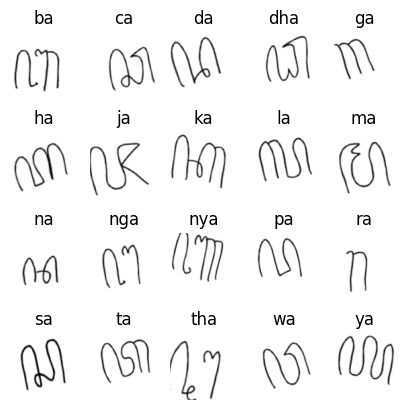

In [77]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plt_image

def show_random_images(directory, num_images_per_class=1):
    num_classes = len(os.listdir(directory))
    num_images = num_images_per_class * num_classes
    plt.figure(figsize=(5, 5))
    
    # Iterate over each class directory
    class_directories = os.listdir(directory)
    for i, class_dir in enumerate(class_directories):
        class_path = os.path.join(directory, class_dir)
        class_images = [os.path.join(class_path, name) for name in os.listdir(class_path)]
        
        # Randomly select num_images_per_class images from the current class
        selected_images = np.random.choice(class_images, num_images_per_class, replace=False)
        
        # Display the selected images
        for j, image_path in enumerate(selected_images):
            plt.subplot(4, 5, i*num_images_per_class + j + 1)
            plt.axis('off')
            plt.title(class_dir)
            img = plt_image.imread(image_path)
            plt.imshow(img)

# Panggil fungsi untuk menampilkan gambar
show_random_images(train_dir, num_images_per_class=1)
plt.show()


In [78]:
def count_files(dir):
    arr = []
    for root, dirs, files in os.walk(dir):
        count = 0
        for name in files:
            if name.endswith(".png"):
              count = count + 1
        if count > 0:
          arr.append(count)
    return arr

def get_all_char_names(dir):
    arr = []
    for root, dirs, files in os.walk(dir):
        # print(dirs)
        arr.append(dirs)
        break
    return arr

20
[['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']]


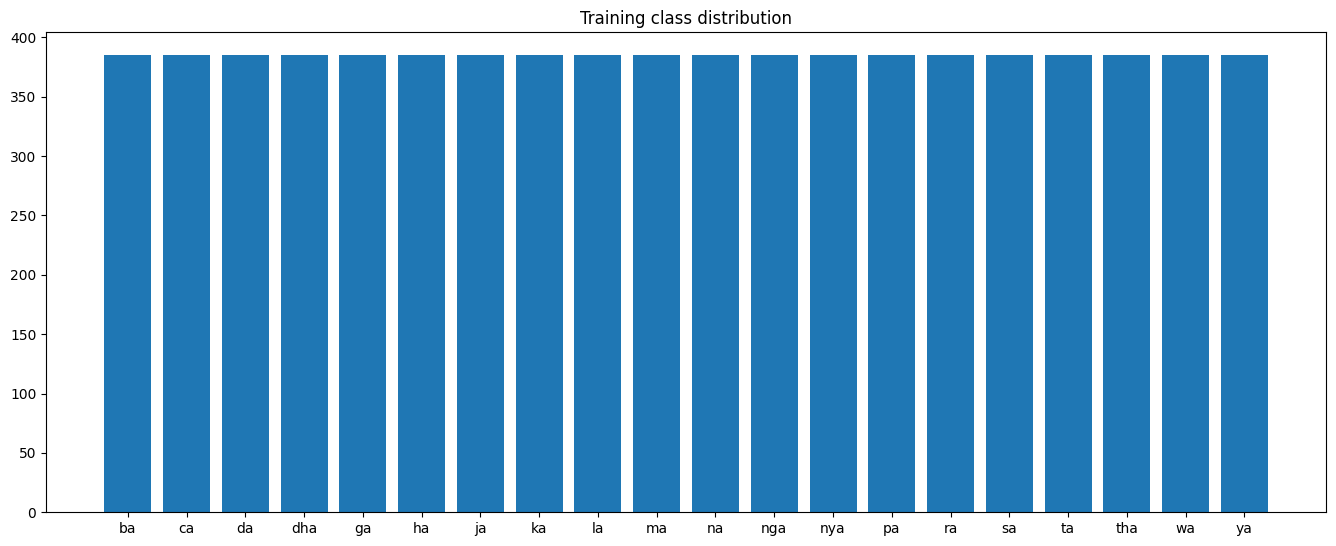

In [79]:
image_count = count_files(train_dir)
print(len(image_count))
chars = get_all_char_names(train_dir)
print(chars)

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(chars[0], image_count)
plt.title("Training class distribution")
plt.show()

In [80]:
# Menghitung jumlah gambar per kelas
file_list = os.listdir(train_dir)

jumlah_gambar_per_kelas = []

for kelas in file_list:
    kelas_path = os.path.join(train_dir, kelas)
    jumlah_gambar = len(os.listdir(kelas_path))
    jumlah_gambar_per_kelas.append(jumlah_gambar)

# Mengecek apakah jumlah data per kelas sudah seimbang
balanced = all(jumlah == jumlah_gambar_per_kelas[0] for jumlah in jumlah_gambar_per_kelas)

# Menampilkan pesan sesuai dengan hasil pemeriksaan
if balanced:
    print("Balanced Data !")
else:
    print("Imbalanced Data !!!\n")
    # Jika imbalanced, tampilkan jumlah data per kelas
    for kelas, jumlah in zip(file_list, jumlah_gambar_per_kelas):
        print(f'Aksara {kelas} jumlah: {jumlah}')

Balanced Data !


20
[['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']]


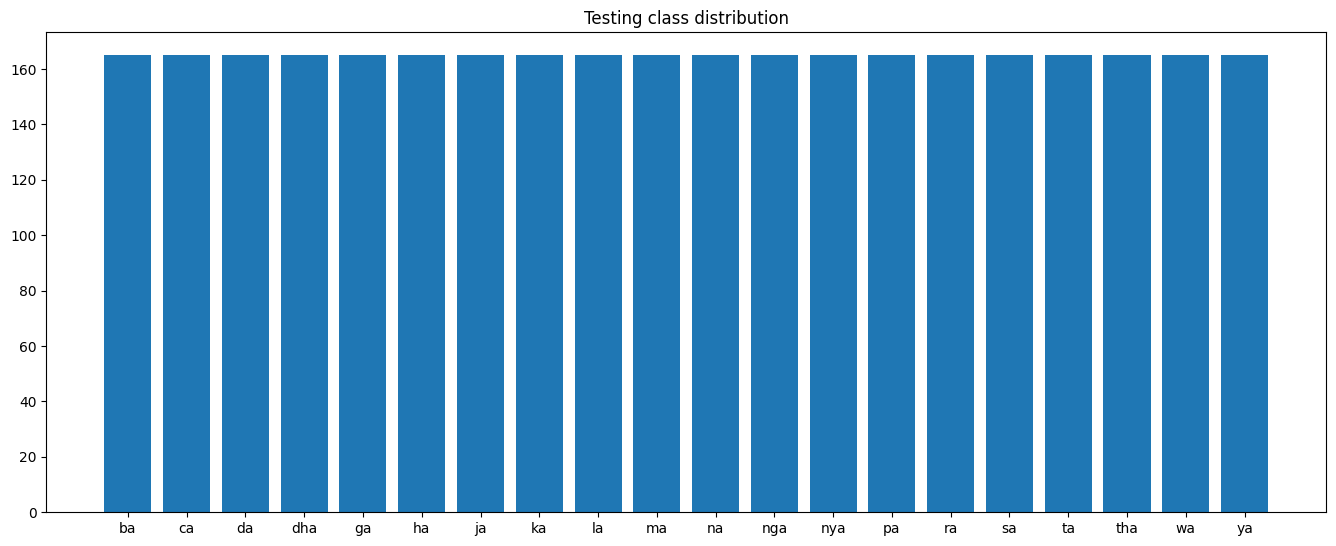

In [81]:
image_count = count_files(test_dir)
print(len(image_count))
chars = get_all_char_names(test_dir)
print(chars)

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(chars[0], image_count)
plt.title("Testing class distribution")
plt.show()

In [82]:
# Buat generator data dengan augmentasi data untuk data pelatihan
train_datagen = ImageDataGenerator(
    rescale=1./255
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=Class
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=Class
)

Found 7700 images belonging to 20 classes.
Found 3300 images belonging to 20 classes.


In [83]:
# Mencari class weights untuk mengatasi ketidakseimbangan kelas
class_weights = compute_sample_weight('balanced', train_generator.classes)
class_weight = dict(enumerate(class_weights))

In [90]:
import tensorflow as tf

# Create Architecture Vgg16
def create_vgg16_model(input_shape=(64, 64, 3), num_classes=NUM_CLASSES):
    model = Sequential()

    # Blok 1
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Blok 2
    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Blok 3
    model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Blok 4
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Blok 5
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Fully connected layers
    model.add(Flatten(name='flatten'))

    # lapisan Dense 1
    model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(BatchNormalization())
    model.add(Dropout(0.75))

    # lapisan Dense 2
    model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(BatchNormalization())
    model.add(Dropout(0.75))

    model.add(Dense(num_classes, activation='softmax'))

    # Adam optimizer with learning rate scheduling and gradient clipping
    opt = Adam(learning_rate=0.1, clipvalue=0.5)  # Gradient clipping
    
    model.compile(optimizer=opt, 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    return model

# Membuat model VGG16
model = create_vgg16_model()

# Menampilkan ringkasan model
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 batch_normalization_90 (Ba  (None, 64, 64, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_79 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 batch_normalization_91 (Ba  (None, 64, 64, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 32, 32, 64)        0         
 ng2D)                                                           
                                                      

In [91]:
# Fungsi untuk menetapkan learning rate secara dinamis
def lr_scheduler(epoch, lr):
    if epoch % 50 == 0 and epoch > 0:
        lr = lr * 0.9  # Contoh: Mengurangi learning rate setiap 10 epoch
    return lr

# Fungsi untuk menghentikan pelatihan jika akurasi mencapai 95%
# class AccuracyThreshold(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs=None):
#         if logs.get('accuracy') > 0.99:
#             print("\nAkurasi mencapai 95%! Menghentikan pelatihan.")
#             self.model.stop_training = True

# Menambahkan learning rate scheduler dan early stopping
lr_schedule = LearningRateScheduler(lr_scheduler)
# accuracy_threshold = AccuracyThreshold()
# callbacks_list = [lr_schedule, accuracy_threshold]
callbacks_list = [lr_schedule]

In [93]:
import tensorflow as tf

# Melatih Model
history = model.fit(
    train_generator,
    # steps_per_epoch=train_generator.samples // BATCH_SIZE,
    batch_size=BATCH_SIZE,
    epochs=100,
    # verbose=1,
    class_weight=class_weight, 
    callbacks=callbacks_list
)

Epoch 1/100
241/241 [==============================] - 1585s 7s/step - loss: 20.4584 - accuracy: 0.0622 - lr: 0.1000
Epoch 2/100
241/241 [==============================] - 1164s 5s/step - loss: 16.8799 - accuracy: 0.0656 - lr: 0.1000
Epoch 3/100
241/241 [==============================] - 1021s 4s/step - loss: 11.4276 - accuracy: 0.0899 - lr: 0.1000
Epoch 4/100
241/241 [==============================] - 1729s 7s/step - loss: 8.8423 - accuracy: 0.1142 - lr: 0.1000
Epoch 5/100
241/241 [==============================] - 1849s 8s/step - loss: 10.9811 - accuracy: 0.1122 - lr: 0.1000
Epoch 6/100
241/241 [==============================] - 1587s 7s/step - loss: 11.0337 - accuracy: 0.1218 - lr: 0.1000
Epoch 7/100
241/241 [==============================] - 1194s 5s/step - loss: 11.3088 - accuracy: 0.1161 - lr: 0.1000
Epoch 8/100
241/241 [==============================] - 1166s 5s/step - loss: 11.5767 - accuracy: 0.1031 - lr: 0.1000
Epoch 9/100
241/241 [==============================] - 1170s 5s/s

AbortedError: Graph execution error:

Detected at node sequential_6/conv2d_82/Relu defined at (most recent call last):
  File "c:\Users\wawn1\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main

  File "c:\Users\wawn1\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code

  File "C:\Users\wawn1\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\wawn1\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1053, in launch_instance

  File "C:\Users\wawn1\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "C:\Users\wawn1\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "c:\Users\wawn1\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever

  File "c:\Users\wawn1\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once

  File "c:\Users\wawn1\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run

  File "C:\Users\wawn1\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "C:\Users\wawn1\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "C:\Users\wawn1\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "C:\Users\wawn1\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "C:\Users\wawn1\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\wawn1\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "C:\Users\wawn1\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell

  File "C:\Users\wawn1\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell

  File "C:\Users\wawn1\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\wawn1\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async

  File "C:\Users\wawn1\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes

  File "C:\Users\wawn1\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code

  File "C:\Users\wawn1\AppData\Local\Temp\ipykernel_9360\2267529345.py", line 4, in <module>

  File "c:\Users\wawn1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\wawn1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1807, in fit

  File "c:\Users\wawn1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1401, in train_function

  File "c:\Users\wawn1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1384, in step_function

  File "c:\Users\wawn1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1373, in run_step

  File "c:\Users\wawn1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1150, in train_step

  File "c:\Users\wawn1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\wawn1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 590, in __call__

  File "c:\Users\wawn1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\wawn1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\wawn1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\wawn1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "c:\Users\wawn1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "c:\Users\wawn1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "c:\Users\wawn1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\wawn1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\wawn1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\wawn1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py", line 321, in call

  File "c:\Users\wawn1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\activations.py", line 306, in relu

  File "c:\Users\wawn1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend.py", line 5395, in relu

Operation received an exception:Status: 1, message: could not create a memory object, in file tensorflow/core/kernels/mkl/mkl_conv_ops.cc:1093
	 [[{{node sequential_6/conv2d_82/Relu}}]] [Op:__inference_train_function_73601]

In [ ]:
# Menampilkan grafik training dan validation accuracy
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']

val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
# Evaluasi model pada data uji
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

In [ ]:
# Menyimpan Model
model.save('../models/aksarajawa_cnn_model.h5')

In [ ]:
# Import the necessary modules
from sklearn import metrics
import math

# Buat generator data untuk data uji
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    val_dir,
    shuffle=False,
    batch_size=32,
    color_mode="rgb",
    target_size=(150, 150),
    class_mode='categorical'
)

# Ganti np.math dengan math
test_steps_per_epoch = math.ceil(test_generator.samples / test_generator.batch_size)

# Gunakan Model.predict alih-alih Model.predict_generator
predictions = model.predict(test_generator, steps=test_steps_per_epoch)

# Dapatkan kelas yang paling mungkin
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

In [ ]:
# Lakukan import untuk metrics
from sklearn import metrics

# Hitung dan tampilkan classification report
report = metrics.classification_report(true_classes,
                                       predicted_classes,
                                       target_names = class_labels)
print(report)

# Hitung dan tampilkan confusion matrix
confusion_matrix = metrics.confusion_matrix(true_classes, predicted_classes)
print(confusion_matrix)

In [ ]:
import pandas as pd
import seaborn as sn

# Buat DataFrame untuk confusion matrix
df_cm = pd.DataFrame(confusion_matrix,
                     index=[i for i in ("ba", "ca", "da", "dha", "ga", "ha", "ja", "ka", "la", "ma",
                                        "na", "nga", "nya", "pa", "ra", "sa", "ta", "tha", "wa", "ya")],

                     columns=[i for i in ("ba", "ca", "da", "dha", "ga", "ha", "ja", "ka", "la", "ma",
                                          "na", "nga", "nya", "pa", "ra", "sa", "ta", "tha", "wa", "ya")])
# Tampilkan heatmap
plt.figure(figsize=(15, 15))
sn.heatmap(df_cm, annot=True)

In [ ]:
# Menguji Model
model = load_model('../models/aksarajawa_cnn_model.h5')
test_image_path = '../data/databyPhiard_original/prediction/ba17.png'
img = image.load_img(test_image_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path2 = '../data/databyPhiard_original/prediction/ba49.mine2.png'
img = image.load_img(test_image_path2, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path2)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path3 = '../data/databyPhiard_original/prediction/ca2.png'
img = image.load_img(test_image_path3, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path3)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path4 = '../data/databyPhiard_original/prediction/da5.png'
img = image.load_img(test_image_path4, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path4)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path5 = '../data/databyPhiard_original/prediction/dha11.png'
img = image.load_img(test_image_path5, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path5)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path6 = '../data/databyPhiard_original/prediction/ga16.png'
img = image.load_img(test_image_path6, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path6)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path7 = '../data/databyPhiard_original/prediction/ha0.png'
img = image.load_img(test_image_path7, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path7)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path8 = '../data/databyPhiard_original/prediction/ja12.png'
img = image.load_img(test_image_path8, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path8)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path9 = '../data/databyPhiard_original/prediction/ka4.png'
img = image.load_img(test_image_path9, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path9)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path10 = '../data/databyPhiard_original/prediction/la9.png'
img = image.load_img(test_image_path10, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path10)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path11 = '../data/databyPhiard_original/prediction/ma.0.jpg'
img = image.load_img(test_image_path11, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path11)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path12 = '../data/databyPhiard_original/prediction/ma.1.jpg'
img = image.load_img(test_image_path12, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path12)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path13 = '../data/databyPhiard_original/prediction/ma15.png'
img = image.load_img(test_image_path13, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path13)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path14 = '../data/databyPhiard_original/prediction/na1.png'
img = image.load_img(test_image_path14, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path14)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path15 = '../data/databyPhiard_original/prediction/nga19.png'
img = image.load_img(test_image_path15, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path15)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path16 = '../data/databyPhiard_original/prediction/nga220.pred.png'
img = image.load_img(test_image_path16, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path16)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path17 = '../data/databyPhiard_original/prediction/nya14.png'
img = image.load_img(test_image_path17, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path17)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path18 = '../data/databyPhiard_original/prediction/pa10.png'
img = image.load_img(test_image_path18, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path18)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path19 = '../data/databyPhiard_original/prediction/ra164.pred.png'
img = image.load_img(test_image_path19, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path19)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path20 = '../data/databyPhiard_original/prediction/ra3.png'
img = image.load_img(test_image_path20, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path20)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path21 = '../data/databyPhiard_original/prediction/sa7.png'
img = image.load_img(test_image_path21, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path21)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path22 = '../data/databyPhiard_original/prediction/ta6.png'
img = image.load_img(test_image_path22, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path22)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path23 = '../data/databyPhiard_original/prediction/tha18.png'
img = image.load_img(test_image_path23, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path23)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path24 = '../data/databyPhiard_original/prediction/wa8.png'
img = image.load_img(test_image_path24, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path24)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path25 = '../data/databyPhiard_original/prediction/ya13.png'
img = image.load_img(test_image_path25, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path25)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path26 = '../data/databyPhiard_original/prediction/nya_01.png'
img = image.load_img(test_image_path26, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path26)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path26 = '../data/databyPhiard_original/prediction/sa_01.png'
img = image.load_img(test_image_path26, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path26)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path26 = '../data/databyPhiard_original/prediction/ha201.png'
img = image.load_img(test_image_path26, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path26)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)